# This document contains an analysis of sales data uptained from kaggle. This document will include data manipulation, data cleaning, and graphs.

In [1]:
import pandas as pd
import os

# Merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')  

files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)


In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Question(1):What was the best month for sales? How much was earned? 

We first have to clean up the data

In [23]:
# Delete Any Blank Data
all_months_data.dropna(inplace=True)
all_months_data

<ipython-input-23-40ec4c8e3bf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data.dropna(inplace=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY),3,7
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA),3,40
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY),4,56
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX),5,53
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA),6,3
...,...,...,...,...,...,...,...,...,...,...,...
2870,298406,AAA Batteries (4-pack),2,2.99,2019-12-31 23:42:00,"30 Elm St, San Francisco, CA 94016",12,5.98,San Francisco (CA),23,42
1914,297481,AA Batteries (4-pack),1,3.84,2019-12-31 23:42:00,"82 Hill St, Dallas, TX 75001",12,3.84,Dallas (TX),23,42
22387,317048,AAA Batteries (4-pack),2,2.99,2019-12-31 23:45:00,"743 Adams St, San Francisco, CA 94016",12,5.98,San Francisco (CA),23,45
14778,309773,AAA Batteries (4-pack),1,2.99,2019-12-31 23:52:00,"60 Hickory St, Los Angeles, CA 90001",12,2.99,Los Angeles (CA),23,52


In [5]:
# Sort Dating by Order Date 
all_months_data.sort_values(by='Order Date', inplace=True)
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
7757,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
# Getting rid of duplicated errors and the tail of the df
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2]!='Or']

In [7]:
# Convert Columns to Correct Type
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered']) # Make Int
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])# Make Float 

<ipython-input-7-2c025551399f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered']) # Make Int
<ipython-input-7-2c025551399f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])# Make Float


In [8]:
# Create additional columns
# Add Month Column
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
all_months_data['Month'] = all_months_data['Month'].astype('int32')
all_months_data.head()

<ipython-input-8-6da095dc887b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
<ipython-input-8-6da095dc887b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Month'] = all_months_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1


In [9]:
# Adding a sales column
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']
all_months_data.head()

<ipython-input-9-9e0ba1440700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90


In [28]:
results = all_months_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1.811768e+06,1.822257e+06,139485,282440
2,13449,2.188885e+06,2.202022e+06,172669,354885
3,17005,2.791208e+06,2.807100e+06,218969,447559
4,20558,3.367671e+06,3.390670e+06,262259,544186
5,18667,3.135125e+06,3.152607e+06,238780,487899
6,15253,2.562026e+06,2.577802e+06,195528,402436
7,16072,2.632540e+06,2.647776e+06,206169,417349
8,13448,2.230345e+06,2.244468e+06,172289,353857
9,13109,2.084992e+06,2.097560e+06,168513,341698


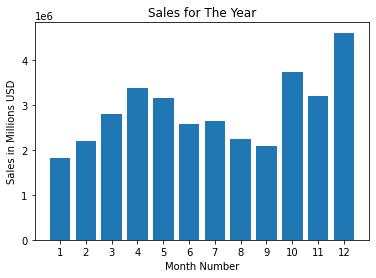

In [11]:
import matplotlib.pyplot as plt

months = range(1,13) 
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Millions USD')
plt.xlabel('Month Number')
plt.title('Sales for The Year')
plt.show()

# Answer(1): December was the best month for Sales (4.6 Million). The worst was January (1.8 Million)

# Question(2):What city had the highest number of sales?

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_months_data.head()

<ipython-input-12-41662ab1d5ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY)
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX)
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA)


In [13]:
city_results = all_months_data.groupby('City').sum()
city_results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


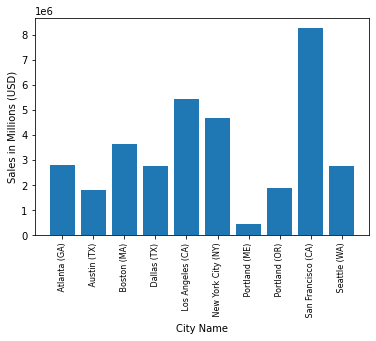

In [14]:
cities = [city for city, df in all_months_data.groupby('City')]

plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in Millions (USD)')
plt.xlabel('City Name')
plt.show()

# Answer(2): San Francisco had the most sales with over 8.2 million

# Question(3): What time should we display ads to maximize likelihood of customers buying product?

In [15]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

<ipython-input-15-b923af6542e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])


In [16]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute
all_months_data.head()

<ipython-input-16-8e3f025b4b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
<ipython-input-16-8e3f025b4b23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Minute'] = all_months_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY),3,7
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA),3,40
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY),4,56
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX),5,53
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA),6,3


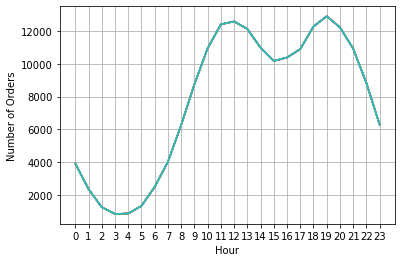

In [18]:
hours = [hour for hour, df in all_months_data.groupby('Hour')]
all_months_data.groupby(['Hour']).count()

plt.plot(hours, all_months_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()


# Answer(3):From this analysis I recommend putting ads either at 12pm or 7pm (19)

# Question(4):What products are most often sold together?

In [19]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df

<ipython-input-19-54396b7d5a72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3764,144804,"Wired Headphones,iPhone"
7190,148074,"USB-C Charging Cable,Google Phone"
7577,148450,"Lightning Charging Cable,iPhone"
3629,144679,"Google Phone,USB-C Charging Cable"
6537,147451,"Google Phone,Wired Headphones"
...,...,...
7847,303147,"Lightning Charging Cable,iPhone"
23858,318458,"iPhone,Apple Airpods Headphones"
1195,296804,"Lightning Charging Cable,AA Batteries (4-pack)"
6465,301832,"20in Monitor,AAA Batteries (4-pack)"


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('Lightning Charging Cable', 'iPhone') 511
('USB-C Charging Cable', 'Google Phone') 504
('iPhone', 'Lightning Charging Cable') 504
('Google Phone', 'USB-C Charging Cable') 495
('iPhone', 'Wired Headphones') 247
('Wired Headphones', 'iPhone') 215
('Wired Headphones', 'Google Phone') 213
('Google Phone', 'Wired Headphones') 210
('USB-C Charging Cable', 'Vareebadd Phone') 190
('iPhone', 'Apple Airpods Headphones') 187


# Answer(4):Lightning Charging Cable and iPhone sold the most

# Question(5):What product sold the most?

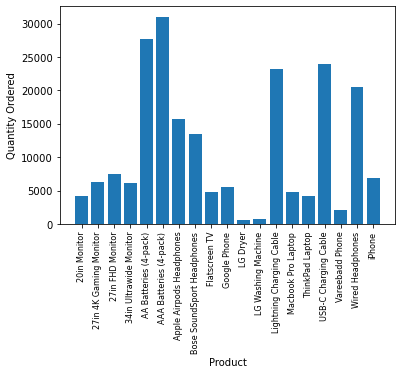

In [21]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

# AAA batteries sold the most. This is most likely due to the cheap price. We will confirm this with a further investigation

<ipython-input-22-08657dc93009>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


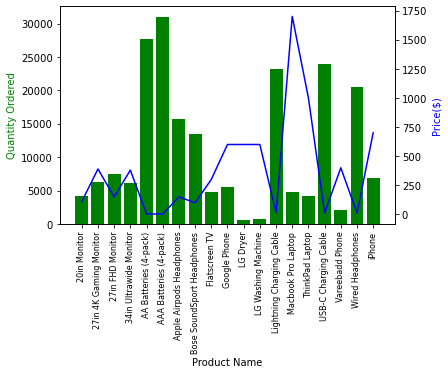

In [22]:
prices = all_months_data.groupby('Product').mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

# The trend tends to be the cheapter the item the more quantity ordered. However MacBooks are an exception to this rule